# Replicates

check overlap of different brains

In [44]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt


In [36]:
in_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/"
out_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/output_figs/"

metadata = pd.read_csv("stp_metadata.csv")

In [37]:
metadata

,brain,species,inj_site
0,ACC_MMus_230403_b1,MMus,ACC
1,ACC_MMus_230404_b2,MMUs,ACC
2,ACC_STeg_230308_b1,STeg,ACC
3,ACC_STeg_230322_b2,STeg,ACC
4,ACC_STeg_230501_b3,STeg,ACC
5,OMC_MMus_220119_b0,MMus,OMC
6,OMC_MMus_220303_b1,MMus,OMC
7,OMC_MMus_220324_b2,MMus,OMC
8,OMC_STeg_220208_b0,STeg,OMC
9,OMC_STeg_220411_b1,STeg,OMC


In [38]:
# get file names
dir_list = os.listdir(in_path)
dir_list

['ACC_MMus_230403_b1_aligned_to_STeg_220429_norm_subtracted.tif',
 'ACC_MMus_230404_b2_aligned_to_STeg_220429_norm_subtracted.tif',
 'ACC_STeg_230308_b1_aligned_to_STeg_220429_norm_subtracted.tif',
 'ACC_STeg_230322_b2_aligned_to_STeg_220429_norm_subtracted.tif',
 'ACC_STeg_230501_b3_aligned_to_STeg_220429_norm_subtracted.tif',
 'OMC_MMus_220119_b0_aligned_to_STeg_220429_norm_subtracted.tif',
 'OMC_MMus_220303_b1_aligned_to_STeg_220429_norm_subtracted.tif',
 'OMC_MMus_220324_b2_aligned_to_STeg_220429_norm_subtracted.tif',
 'OMC_STeg_220208_b0_aligned_to_STeg_220429_norm_subtracted.tif',
 'OMC_STeg_220411_b1_aligned_to_STeg_220429_norm_subtracted.tif',
 'OMC_STeg_220429_b2_aligned_to_STeg_220429_norm_subtracted.tif']

In [39]:
steg_idx = metadata['species'] == "STeg"
steg_meta = metadata[steg_idx]
steg_omc_meta = steg_meta[steg_meta["inj_site"]=="OMC"]
steg_omc_idx = list(steg_omc_meta.index)
for i in steg_omc_idx:
    print(dir_list[i])

OMC_STeg_220208_b0_aligned_to_STeg_220429_norm_subtracted.tif
OMC_STeg_220411_b1_aligned_to_STeg_220429_norm_subtracted.tif
OMC_STeg_220429_b2_aligned_to_STeg_220429_norm_subtracted.tif


In [40]:
steg_omc_meta.iloc[0, 0]

'OMC_STeg_220208_b0'

In [43]:
# import images
images = []
for i in steg_omc_idx:
    images.append(tf.imread(in_path+dir_list[i]))
    # images.append(io.imread(in_path+dir_list[i]))
    # print(in_path+dir_list[i])


# View and animate 3 Replicates in napari

In [9]:
viewer = napari.Viewer()

In [10]:
colors = ["green", "cyan", "magenta"]
for i in range(len(images)):
    viewer.add_image(
        images[i],
        name=steg_omc_meta.iloc[i, 0],
        scale=[2.5,1,1],
         # contrast_limits=[0,1],
         blending="additive",
        colormap=colors[i]
        )

In [17]:
im_size = images[0].shape[0]
im_size

201

In [12]:
from napari_animation import Animation


In [34]:
# capture scroll through brain
animation = Animation(viewer)

animation.capture_keyframe()

for i in range(200):
    viewer.dims.set_point(0, i*20)
    animation.capture_keyframe()


# animation.animate(out_path+'steg_omc_all.mov', canvas_only=True)
animation.animate(out_path+'steg_all.mp4')

Rendering frames...


100%|██████████| 3001/3001 [01:43<00:00, 28.89it/s]


# Threshold Injection Site

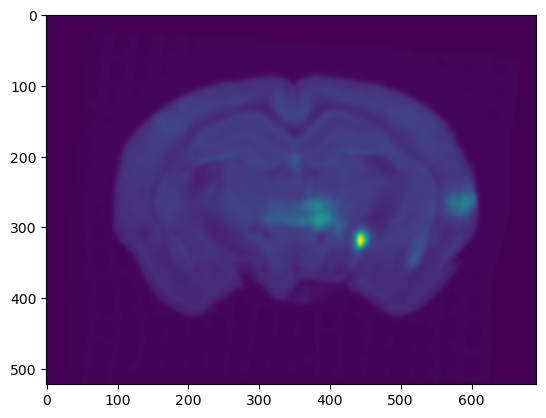

In [45]:
from scipy.ndimage import gaussian_filter # for applying gaussian filter for density plots
# use sigma=3, based on what used for contour plots

images_blur = [gaussian_filter(im,sigma=3) for im in images]


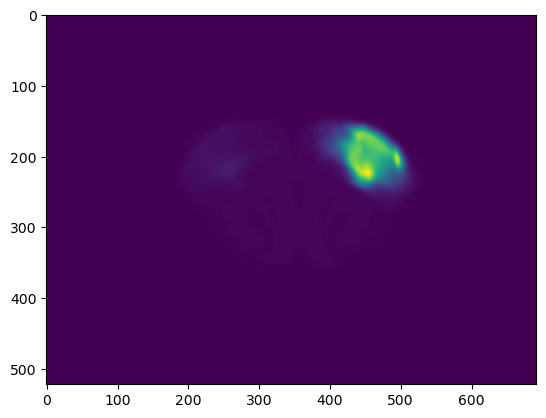

In [47]:
plt.imshow(images_blur[0][25])

In [50]:
from scipy.ndimage import median_filter # for applying gaussian filter for density plots

images_med = [median_filter(im) for im in images]
plt.show(images_med[0][25])

RuntimeError: no footprint or filter size provided

: 

In [ ]:
plt.show(images[0][25])